In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target

bos = bos.sample(frac = 1, random_state=3) 

y = bos['Price']
X = bos.drop(['Price'], axis=1)

In [5]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV

In [12]:
lasso = Lasso(alpha=.2)
lasso.fit(X, y)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
lasso.coef_

array([-0.09562686,  0.04958111, -0.02340633,  0.        , -0.        ,
        3.40600664, -0.00506212, -1.10330301,  0.28174797, -0.0151714 ,
       -0.77893082,  0.01015377, -0.59440239])

In [14]:
pd.DataFrame(lasso.coef_, index = X.columns, columns = ['Coefs']) # Giving row and column name to coefs.

,Coefs
CRIM,-0.095627
ZN,0.049581
INDUS,-0.023406
CHAS,0.000000
NOX,-0.000000
RM,3.406007
AGE,-0.005062
DIS,-1.103303
RAD,0.281748
TAX,-0.015171


Lasso helps in reducing the coefs size and the coefs of NOX became 0 and the other variables coefs have also decreased.

In [19]:
coefs = []
alphas = np.linspace(0.01, 0.2, 100)

for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)


In [20]:
coefs

[array([-1.06228354e-01,  4.68603033e-02,  6.47427472e-03,  2.50419017e+00,
        -1.43944776e+01,  3.81418583e+00, -1.81830336e-03, -1.42215548e+00,
         2.98525812e-01, -1.26273172e-02, -9.16368723e-01,  9.48546597e-03,
        -5.30481493e-01]),
 array([-1.05886320e-01,  4.69452528e-02,  3.76738139e-03,  2.46915632e+00,
        -1.37472464e+01,  3.81499986e+00, -2.29962818e-03, -1.41191183e+00,
         2.97080889e-01, -1.26834267e-02, -9.09383684e-01,  9.51878105e-03,
        -5.31581327e-01]),
 array([-1.05543664e-01,  4.70300817e-02,  1.06417226e-03,  2.43411256e+00,
        -1.30998182e+01,  3.81581455e+00, -2.78085553e-03, -1.40165644e+00,
         2.95637212e-01, -1.27397086e-02, -9.02398690e-01,  9.55213262e-03,
        -5.32682535e-01]),
 array([-1.05171827e-01,  4.71542152e-02, -0.00000000e+00,  2.39669688e+00,
        -1.24796303e+01,  3.81763868e+00, -3.26264413e-03, -1.39029172e+00,
         2.94700160e-01, -1.28403587e-02, -8.95873947e-01,  9.58789087e-03,
       

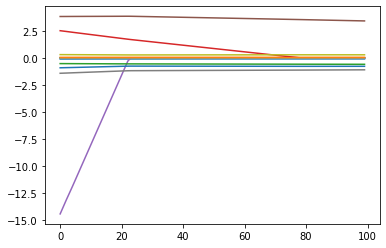

In [21]:
plt.plot(coefs)
plt.show()

The figure above illustrate the behavior of Lasso Regulariztion. It shows that as we increase alpha, it is setting more and more coefficients to zero.

To determine the right alpha for us, for that we'll do Hyper Parameter tuning.

### Hyper Parameter tuning to find the best alpha(penalty term) for this data

In [24]:
alphas = np.linspace(0.1, 1, 100)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=3)
lasso_cv.fit(X, y)

LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [27]:
lasso_cv.alpha_  # To determine the best alpha

0.1

Lasso CV chose 0.1 as the best alpha (lowest in the range). Such a low value of alpha suggest that Lasso Regularization is not required for this model.

In [28]:
# So we'll make our model complex

X['CRIM2'] = np.square(X['CRIM'])
X['CRIM3'] = (X['CRIM']**3)
X['CRIM4'] = (X['CRIM']**4)

X['AGE2'] = np.square(X['AGE'])
X['AGE3'] = (X['AGE']**3)
X['AGE4'] = (X['AGE']**4)

In [29]:
alphas = np.linspace(0.1, 1, 100)

lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=3, max_iter=10000)
lasso_cv.fit(X, y)

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5271.604019768071, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3160.6189504752774, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 476.73650804164026, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mi

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.3394477693946, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 285.9180134729977, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 289.56411320872576, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mig

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 457.0763383577705, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 466.17117026586675, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 475.67068342811217, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mi

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3962.905819279302, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3982.9374165086233, tolerance: 2.905135560830861
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5497.289808202282, tolerance: 2.8375366587537094
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mi

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 477.5560769003787, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 481.7271160454875, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 485.9543318919841, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You m

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 647.9803734246143, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 654.7450586733057, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 661.654376758479, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You mi

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 955.2856378025435, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 971.7197002974981, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 988.8307370384573, tolerance: 2.7965138343195264
  tol, rng, random, positive)
C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:471: ConvergenceWarning: Objective did not converge. You m

C:\Users\satyam\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6241.571258729317, tolerance: 4.2716295415019765
  positive)


LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.381818...
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
        copy_X=True, cv=3, eps=0.001, fit_intercept=True, max_iter=10000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=3, selection='cyclic', tol=0.0001,
        verbose=False)

In [30]:
lasso_cv.alpha_

0.13636363636363635

In [32]:
lasso_cv.coef_

array([-2.50041532e-01,  4.07441741e-02, -5.41909499e-02,  4.22218898e-01,
       -0.00000000e+00,  3.67835300e+00, -0.00000000e+00, -1.13405912e+00,
        3.12700597e-01, -1.53544659e-02, -7.61095671e-01,  9.54959756e-03,
       -5.96050782e-01,  7.65807676e-03, -1.06216119e-04,  3.57051406e-07,
        6.50009475e-04, -3.05023214e-05,  2.44260911e-07])

In [33]:
pd.DataFrame(lasso_cv.coef_, index = X.columns, columns=['coefs'])

,coefs
CRIM,-2.500415e-01
ZN,4.074417e-02
INDUS,-5.419095e-02
CHAS,4.222189e-01
NOX,-0.000000e+00
RM,3.678353e+00
AGE,-0.000000e+00
DIS,-1.134059e+00
RAD,3.127006e-01
TAX,-1.535447e-02


In [36]:
lasso_cv.mse_path_   # We are getting the MSE of each fold.

array([[31.54820146, 27.34208191, 47.47606062],
       [31.44303731, 27.34362724, 50.33833703],
       [31.33157384, 27.29822243, 50.22060198],
       [31.22056558, 27.2486152 , 49.88506552],
       [31.11043293, 27.19804691, 49.53694143],
       [31.00120165, 27.14806042, 49.19053262],
       [30.89287332, 27.09864126, 48.84683302],
       [30.78544802, 27.04978906, 48.50591157],
       [30.67892577, 27.00150411, 48.16777301],
       [30.57330656, 26.95378646, 47.83241773],
       [30.46859039, 26.9066358 , 47.49984579],
       [30.36477727, 26.8600524 , 47.17005721],
       [30.2618672 , 26.8140363 , 46.84305191],
       [30.15986017, 26.76858721, 46.51882988],
       [30.05875618, 26.72370537, 46.19739115],
       [29.95855524, 26.67939054, 45.8787358 ],
       [29.85925734, 26.63564296, 45.56286375],
       [29.76086249, 26.59246241, 45.24977495],
       [29.66337068, 26.54984941, 44.93946947],
       [29.56678192, 26.50780322, 44.63194735],
       [29.4710962 , 26.46632424, 44.327

In [38]:
lasso_cv.mse_path_.mean()

30.670821612062706

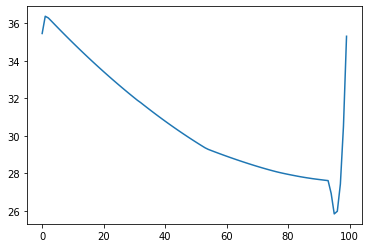

In [40]:
lasso_cv.mse_path_.mean(1)

plt.plot(lasso_cv.mse_path_.mean(1))

### Ridge Regularization

In [41]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target

bos = bos.sample(frac = 1, random_state=3) 

y = bos['Price']
X = bos.drop(['Price'], axis=1)

In [69]:
ridge_alphas = np.logspace(-2, -1, 100)
ridge_cv = RidgeCV(alphas = ridge_alphas, store_cv_values=True)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([0.01      , 0.01023531, 0.01047616, 0.01072267, 0.01097499,
       0.01123324, 0.01149757, 0.01176812, 0.01204504, 0.01232847,
       0.01261857, 0.0129155 , 0.01321941, 0.01353048, 0.01384886,
       0.01417474, 0.01450829, 0.01484968, 0.01519911, 0.01555676,
       0.01592283, 0.01629751, 0.01668101, 0.01707353, 0.01747528,
       0.0178865 , 0.01830738, 0.01873817, 0.0191791 , 0.01963041,
       0.02009...
       0.05722368, 0.05857021, 0.05994843, 0.06135907, 0.06280291,
       0.06428073, 0.06579332, 0.06734151, 0.06892612, 0.07054802,
       0.07220809, 0.07390722, 0.07564633, 0.07742637, 0.07924829,
       0.08111308, 0.08302176, 0.08497534, 0.0869749 , 0.08902151,
       0.09111628, 0.09326033, 0.09545485, 0.097701  , 0.1       ]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=True)

In [70]:
ridge_cv.alpha_

0.03678379771828634

In [71]:
ridge_cv.coef_

array([-1.07805433e-01,  4.64780992e-02,  1.88138779e-02,  2.68045230e+00,
       -1.73526918e+01,  3.81310803e+00,  3.24038433e-04, -1.46946799e+00,
        3.05078019e-01, -1.23674033e-02, -9.48157516e-01,  9.33326854e-03,
       -5.25217160e-01])

In [72]:
pd.DataFrame(ridge_cv.coef_, index = X.columns, columns = ['coefs'])

,coefs
CRIM,-0.107805
ZN,0.046478
INDUS,0.018814
CHAS,2.680452
NOX,-17.352692
RM,3.813108
AGE,0.000324
DIS,-1.469468
RAD,0.305078
TAX,-0.012367


In [73]:
ridge_cv.cv_values_.mean(0)

array([23.72547778, 23.72547254, 23.72546722, 23.72546184, 23.72545638,
       23.72545085, 23.72544525, 23.72543958, 23.72543384, 23.72542804,
       23.72542217, 23.72541624, 23.72541025, 23.7254042 , 23.72539809,
       23.72539193, 23.72538571, 23.72537945, 23.72537315, 23.7253668 ,
       23.72536042, 23.72535401, 23.72534756, 23.7253411 , 23.72533462,
       23.72532813, 23.72532163, 23.72531513, 23.72530865, 23.72530217,
       23.72529573, 23.72528931, 23.72528294, 23.72527662, 23.72527037,
       23.72526418, 23.72525809, 23.72525209, 23.7252462 , 23.72524044,
       23.72523481, 23.72522935, 23.72522405, 23.72521895, 23.72521405,
       23.72520939, 23.72520497, 23.72520083, 23.72519698, 23.72519345,
       23.72519026, 23.72518745, 23.72518504, 23.72518306, 23.72518154,
       23.72518052, 23.72518003, 23.72518011, 23.7251808 , 23.72518214,
       23.72518417, 23.72518694, 23.72519049, 23.72519488, 23.72520015,
       23.72520637, 23.72521359, 23.72522187, 23.72523127, 23.72

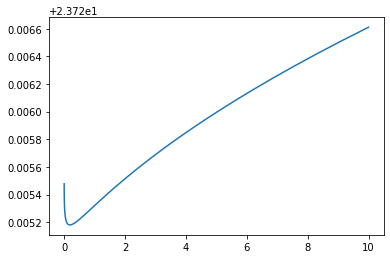

In [74]:
plt.plot(np.logspace(-3, 1, 100), ridge_cv.cv_values_.mean(0))

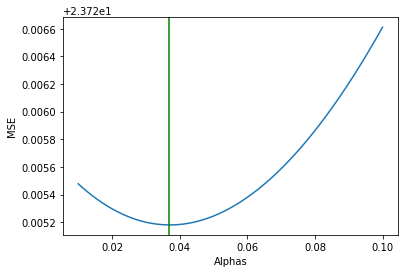

In [75]:
plt.plot(ridge_cv.alphas, ridge_cv.cv_values_.mean(0))
plt.axvline(ridge_cv.alpha_, c = 'g')
plt.xlabel('Alphas')
plt.ylabel('MSE')
plt.show()

### Elastic Net Regularization

In [76]:
alphas = np.logspace(-3, -2, 100)

en_cv = ElasticNetCV(alphas=alphas, cv=3, random_state=3)
en_cv.fit(X, y)

ElasticNetCV(alphas=array([0.001     , 0.00102353, 0.00104762, 0.00107227, 0.0010975 ,
       0.00112332, 0.00114976, 0.00117681, 0.0012045 , 0.00123285,
       0.00126186, 0.00129155, 0.00132194, 0.00135305, 0.00138489,
       0.00141747, 0.00145083, 0.00148497, 0.00151991, 0.00155568,
       0.00159228, 0.00162975, 0.0016681 , 0.00170735, 0.00174753,
       0.00178865, 0.00183074, 0.00187382, 0.00191791, 0.00196304,
       0...
       0.00722081, 0.00739072, 0.00756463, 0.00774264, 0.00792483,
       0.00811131, 0.00830218, 0.00849753, 0.00869749, 0.00890215,
       0.00911163, 0.00932603, 0.00954548, 0.0097701 , 0.01      ]),
             copy_X=True, cv=3, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=3,
             selection='cyclic', tol=0.0001, verbose=0)

In [77]:
en_cv.alpha_

0.001

Since optimal alpha is hitting the boundary at lowest level, we can conclude that elastic net is not required for this model.